In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import seaborn as sb


In [2]:
#load csv from my cpu

df = pd.read_csv("bank1.csv")

In [3]:
df.shape

(45211, 17)

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
#check data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [7]:
#checking for any missing data

df.isnull().values.any()

False

In [8]:
#removing calls of less than 3 minutes

df.drop(df[df['duration'] < 360].index, inplace = True)

In [9]:
df.y.value_counts()

no     6353
yes    3053
Name: y, dtype: int64

# EDA

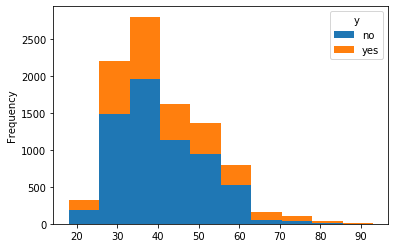

In [10]:
#Looking at how age impacted decision

df.pivot(columns = 'y').age.plot(kind = 'hist', stacked = True)

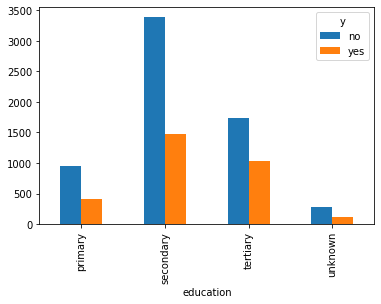

In [11]:
#https://stackoverflow.com/questions/48238305/bar-plot-with-groupby
#looking at how education impacted decision

df.groupby('y').education.value_counts().unstack(0).plot.bar()

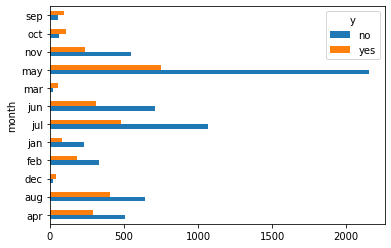

In [12]:
#Looking at how the month of the year impacted the decision

df.groupby('y').month.value_counts().unstack(0).plot.barh()

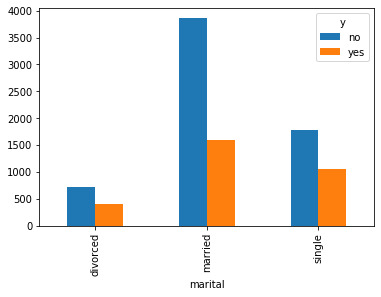

In [13]:
#looking at marital status impact on decision

df.groupby('y').marital.value_counts().unstack(0).plot.bar()

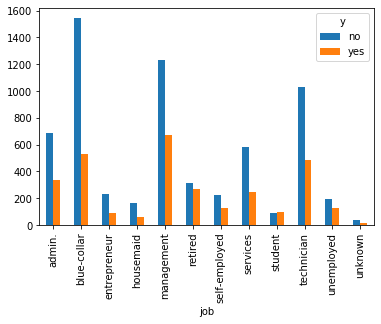

In [14]:
#Looking at occupation impact on decision

df.groupby('y').job.value_counts().unstack(0).plot.bar()

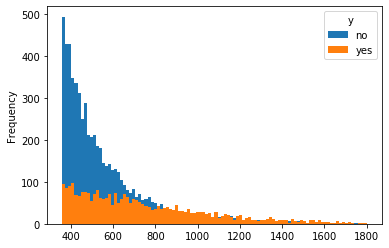

In [15]:
#looking at the impact of call duration on the decision

df.pivot(columns = 'y').duration.plot(bins = 100, range =(360, 1800), kind = 'hist', stacked = False)

In [16]:
#changing objects into numerical values

words_to_numbers = {"marital":     {"single": 1, "married": 2, "divorced": 3},
                    "education":     {"primary": 1, "secondary": 2, "tertiary": 3, "unknown": 4},
                    "job":          {"admin.": 1, "blue-collar": 2, "entrepreneur": 3, "housemaid": 4, "management": 5, "retired": 6, "self-employed": 7, "services": 8, "student": 9, "technician": 10, "unemployed": 11, "unknown":12},
                    "default":     {"no": 0, "yes": 1},
                    "housing":     {"no": 0, "yes": 1},
                    "loan":     {"no": 0, "yes": 1},
                    "month":    {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12},
                    "y":     {"no": 0, "yes": 1}
                   }

In [17]:
df.replace(words_to_numbers, inplace=True)

In [18]:
customer_data = ['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous']

In [19]:
x = df[customer_data]
y = df['y']

In [20]:
yes_no = df['y'].value_counts() 
yes_no[0]

6353

In [21]:
yes_no = df['y'].value_counts() 
yes_no[1]

3053

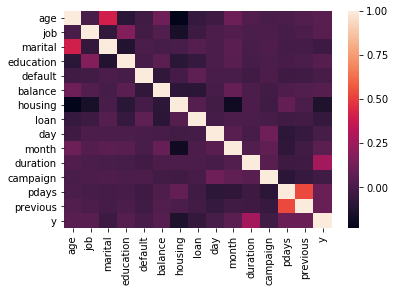

In [22]:
#some expected correlations like job and education or age and marital status
#call duration strongest correlation with outcome

sb.heatmap(df.corr())

# Decision Tree 

In [23]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state = 1)

In [24]:
classifier = DecisionTreeClassifier()

classifier = classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

In [25]:
print(metrics.accuracy_score(y_test, y_pred))

0.667375132837407


In [26]:
confusion_matrix(y_test, y_pred)

array([[957, 322],
       [304, 299]], dtype=int64)

The decision tree was not very accurate.  